#**Exploratory Data Analysis (EDA)**


Exploratory Data Analysis (EDA) is a process of describing the data by means of statistical and visualization techniques in order to bring important aspects of that data into focus for further analysis. This involves inspecting the dataset from many angles, describing & summarizing it without making any assumptions about its contents.

### Types of EDA:-
- There are three types of EDA:
- 1) Univariate Analysis
- 2) Bivariate Analysis
- 3) Multivariate Analysis

### **Step_1 : Understand the Data**
- **Order ID** - Unique identifier for each order.
- **Product Name**- Name of the product sold.
- **Category** - Product category (e.g., Electronics, Apparel, etc.).
- **Price**- Price of the product.
Quantity Sold - Number of units sold.
- **Total Sales** - Total sales amount (Price * Quantity Sold).
- **Order Date** - Date of the order.
- **Customer ID** - Unique identifier for each customer.
- **Region**- Geographic region of the sale.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('sample_sales_data.csv')

In [3]:
# 1) How big is the data? Ans):- Check the shape of the dataset
data.shape # It return no of rows and columns

(2000, 9)

In [4]:
# 2) what does the data look likes? Ans):- Look at the first few rows of the dataset using head()- It displays first five rows  or sample() it display the randomly selected items row of the dataset.
data.head()

,Order ID,Product Name,Category,Price,Quantity Sold,Total Sales,Order Date,Customer ID,Region
0,1001,Process,Sports,307.48,9,2767.32,2024-02-15,10334,South
1,1002,Open,Books,277.88,6,1667.28,2023-12-20,10287,North
2,1003,Show,Home & Kitchen,123.65,3,370.95,2022-10-03,10251,North
3,1004,Whether,Books,201.54,7,1410.78,2024-02-03,10264,West
4,1005,Sing,Books,301.29,9,2711.61,2022-11-29,10270,East


In [5]:
data.sample(5)

,Order ID,Product Name,Category,Price,Quantity Sold,Total Sales,Order Date,Customer ID,Region
1671,2672,Could,Sports,319.40,9,2874.60,2024-06-20,10111,West
1841,2842,NaN,Electronics,17.05,8,136.40,2024-03-27,10988,North
1867,2868,Indeed,Apparel,328.26,2,656.52,2023-03-25,10920,East
437,1438,Memory,Home & Kitchen,211.44,4,845.76,2022-09-01,10700,East
7,1008,Market,Home & Kitchen,76.86,7,538.02,2023-09-29,10699,South


In [6]:
# 3) What type of information are stored in each column? Ans):- check the data types of each column using dtypes or info() it provides information about the dataset,including memory usage.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       2000 non-null   int64  
 1   Product Name   1997 non-null   object 
 2   Category       2000 non-null   object 
 3   Price          2000 non-null   float64
 4   Quantity Sold  2000 non-null   int64  
 5   Total Sales    2000 non-null   float64
 6   Order Date     2000 non-null   object 
 7   Customer ID    2000 non-null   int64  
 8   Region         2000 non-null   object 
dtypes: float64(2), int64(3), object(4)
memory usage: 140.8+ KB


In [7]:
data.dtypes

,0
Order ID,int64
Product Name,object
Category,object
Price,float64
Quantity Sold,int64
Total Sales,float64
Order Date,object
Customer ID,int64
Region,object


In [8]:
# 4) Are there any missing values in the data? Ans):- Check for the presence of mising values using isnull() or isna().
data.isnull().sum() # it gives the total no of missing values per column.

,0
Order ID,0
Product Name,3
Category,0
Price,0
Quantity Sold,0
Total Sales,0
Order Date,0
Customer ID,0
Region,0


In [9]:
(data.isnull().sum() / data.shape[0] )*100

,0
Order ID,0.00
Product Name,0.15
Category,0.00
Price,0.00
Quantity Sold,0.00
Total Sales,0.00
Order Date,0.00
Customer ID,0.00
Region,0.00


In [10]:
# 5) How is the data distributed statistically? Ans):- Obtain statistical measures using describe()
data.describe()# It gives statistical measures for numerical columns.

,Order ID,Price,Quantity Sold,Total Sales,Customer ID
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,2000.500000,254.691875,5.019000,1277.675885,10499.128500
std,577.494589,141.397981,2.564357,1032.538017,289.697301
min,1001.000000,10.010000,1.000000,10.010000,10000.000000
25%,1500.750000,133.915000,3.000000,402.602500,10242.000000
50%,2000.500000,257.450000,5.000000,1004.360000,10501.000000
75%,2500.250000,376.742500,7.000000,1904.830000,10753.000000
max,3000.000000,499.460000,9.000000,4447.260000,10999.000000


In [11]:
# 6) Are there duplicate values? Ans):- Identify and remove duplicates using duplicates().
data.duplicated().sum() # It gives the total no of duplicate values.

0

In [12]:
# To remove duplicate values
data.drop_duplicates(inplace=True)

In [13]:
#7) How are different columns related to each other? Ans):- Examine the correlation matrix and visualize it if needed.
#Correlation matrix:-
c=data[['Price','Quantity Sold','Total Sales']]
c.corr()

,Price,Quantity Sold,Total Sales
Price,1.000000,-0.001718,0.700604
Quantity Sold,-0.001718,1.000000,0.622755
Total Sales,0.700604,0.622755,1.000000


<Axes: >

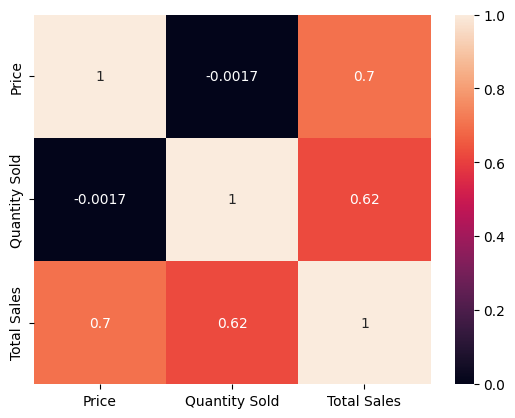

In [14]:
# Heatmap() to visualizes the correlation matrix.
sns.heatmap(c.corr(),annot=True)

In [15]:
# 8) How many unique values are there in a specific column? Ans):- Use the nunique() method to find the no of unique values in particular column.
data['Product Name'].nunique()

846

# **Step_2 :- Univariate Graphical Analysis.**

- Uni means one and variate means variable, so in univariate analysis, there is only one dependable variable. The objective of univariate analysis is to derive the data, define and summarize it, and analyze the pattern present in it. In a dataset, it explores each variable separately. It is possible for two kinds of variables- Categorical and Numerical.

## **Categorical Data**

<Axes: xlabel='count', ylabel='Category'>

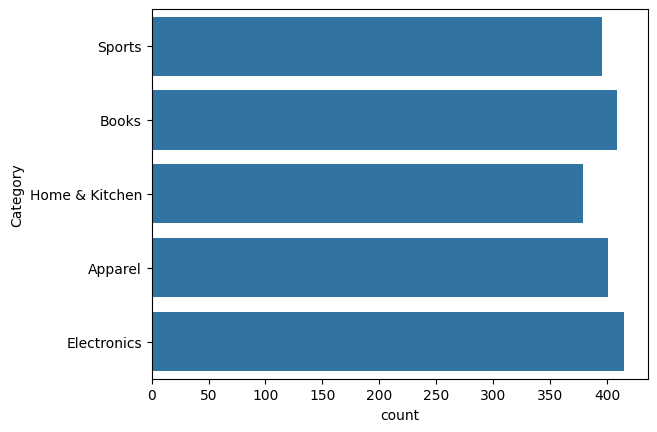

In [19]:
# a) Countplot
# purpose :- Count occurrences of each category in a categorical Varialbe.
sns.countplot(data['Category'])

([<matplotlib.patches.Wedge at 0x77fd543321a0>,
 [Text(0.8744387974737231, 0.667350574640278, 'Electronics'),
  Text(-0.4033299587239934, 1.0233889506906462, 'Books'),
  Text(-1.0967432824142802, -0.08458234141444859, 'Apparel'),
  Text(-0.2635053492439399, -1.0679723455782129, 'Sports'),
  Text(0.9107587113972806, -0.6168618723944326, 'Home & Kitchen')],
 [Text(0.4769666168038489, 0.36400940434924256, '20.75%'),
  Text(-0.21999815930399638, 0.5582121549221706, '20.45%'),
  Text(-0.5982236085896073, -0.04613582258969923, '20.05%'),
  Text(-0.1437301904966945, -0.5825303703153887, '19.80%'),
  Text(0.4967774789439712, -0.336470112215145, '18.95%')])

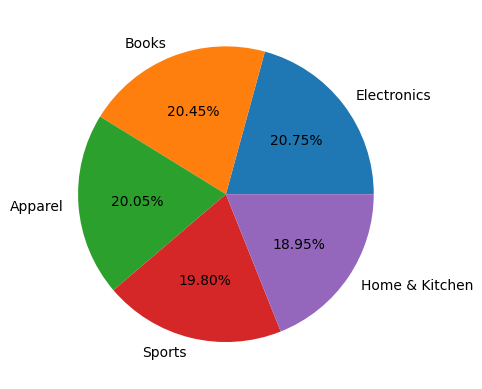

In [21]:
# b) PieChart
# Purpose:- Display the proportion of each category ina categorical variable.
plt.pie(data['Category'].value_counts(),labels= data['Category'].value_counts().index,autopct='%1.2f%%')

### 2.Numerical Data

<Axes: xlabel='Price', ylabel='Count'>

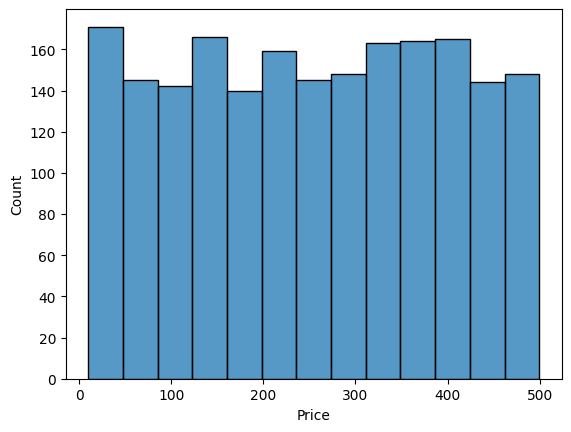

In [23]:
# a) Histogram
# Purpose:- Visualize the distribution of a numerical variable.
sns.histplot(data['Price'])

<ipython-input-24-da721a4ad0dc>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Price'])


<Axes: xlabel='Price', ylabel='Density'>

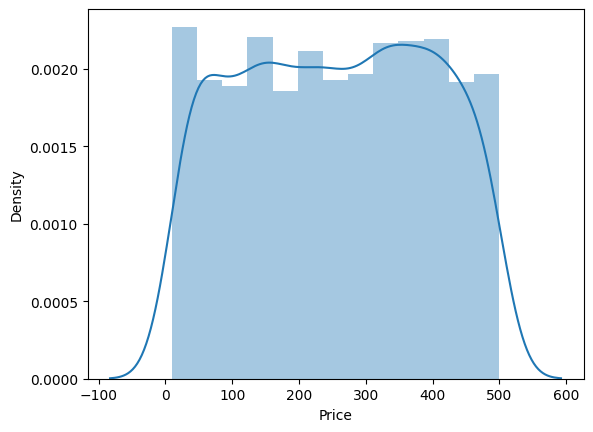

In [24]:
#  b) Distplot
# Purpose:- Display the distribution of a numerical variable or column.
sns.distplot(data['Price'])

<Axes: ylabel='Price'>

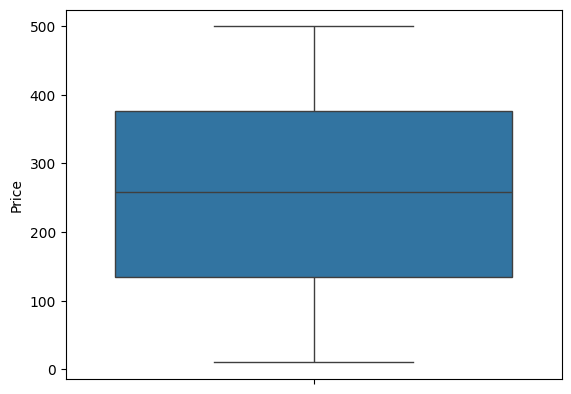

In [25]:
# C).Box Plot (Bx-and Whisker Plots)
# Purpose:- Show Summary statistics and identify outliers in numerical data.
sns.boxplot(data['Price'])

### **Step_3 :- Bi/Multi-Variate Graphical Analysis**

 Bivariate graphical analysis involves examining the relationship between two variables through visual representation. Multivariate Analysis is an extension of bivariate analysis which means it involves multiple variables at the same time to find correlation between them.

The main three types we will see here are

- Numerical V/s Numerical

- Categorical v/s Numerical

- Categorical V/s Categorical data

In [26]:
tips_data=sns.load_dataset('tips')

In [27]:
tips_data.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [29]:
tips_data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### **1) Visualizing (Numerical-Numerical) Colunms**

<Axes: xlabel='total_bill', ylabel='tip'>

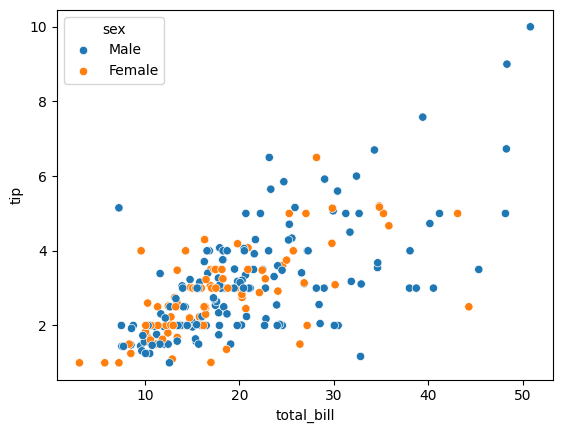

In [31]:
# 1) ScatterPlot()
# Purpose:- Examine the relationship between two numerical variables.
sns.scatterplot(x=tips_data['total_bill'],y=tips_data['tip'],hue=tips_data['sex'])

<Axes: xlabel='total_bill', ylabel='tip'>

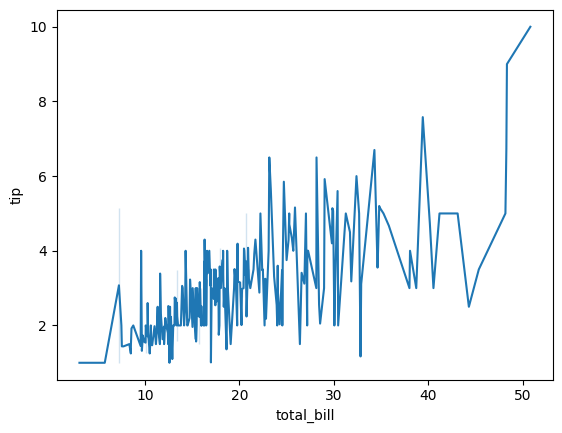

In [33]:
# 2) Line Plot()
# Purpose :- Display relationship between two continuous variables.
sns.lineplot(x=tips_data['total_bill'],y=tips_data['tip'])

### **2) Visualizing (Numerical- Categorical) Columns**

<Axes: xlabel='day', ylabel='total_bill'>

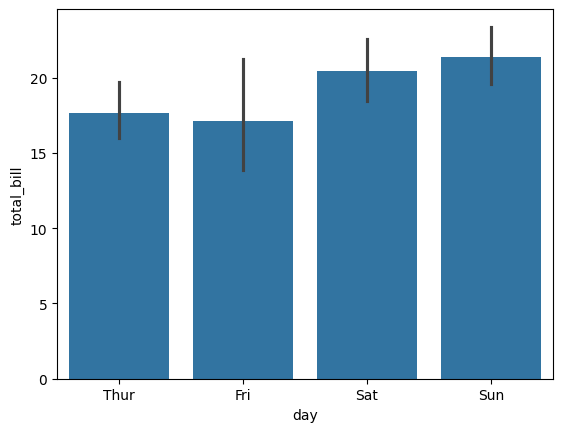

In [34]:
# 1) Bar Plot
# Purpose :- Visualize  the distribution of categorical variables.
sns.barplot(x=tips_data['day'],y=tips_data['total_bill'])

<Axes: xlabel='day', ylabel='total_bill'>

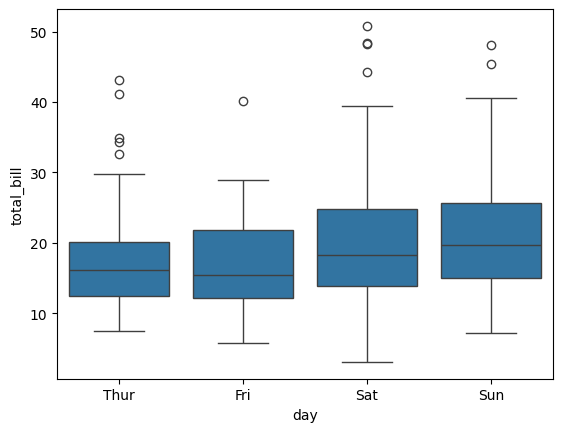

In [36]:
# 2) Box Plot Grouped by Category:
# Purpose: Compare the distribution of a numerical variable across different categories.
sns.boxplot(x=tips_data['day'],y=tips_data['total_bill'])

<ipython-input-37-9e7d7472d09a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tips_data['total_bill'])


<Axes: xlabel='total_bill', ylabel='Density'>

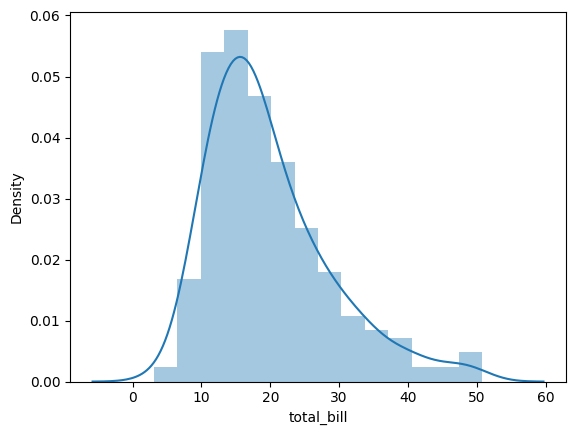

In [37]:
# 3) Distplot
# Purpose :- Compare distributions of numerical variables across categories.
sns.distplot(tips_data['total_bill'])

###  **3) Visualizing (Categorical-Categorical) Columns**

In [39]:
# 1) HeatMap
# Purpose :- Display correlation coefficients between two numerical variables.
pd.crosstab(tips_data['day'],tips_data['time'])

time,Lunch,Dinner
day,,
Thur,61,1
Fri,7,12
Sat,0,87
Sun,0,76


<Axes: xlabel='smoker', ylabel='sex'>

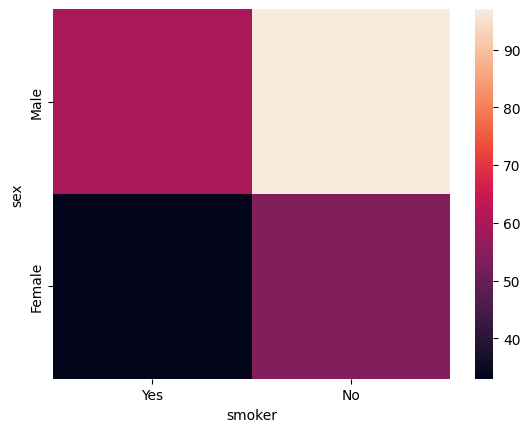

In [42]:
sns.heatmap(pd.crosstab(tips_data['sex'],tips_data['smoker']))

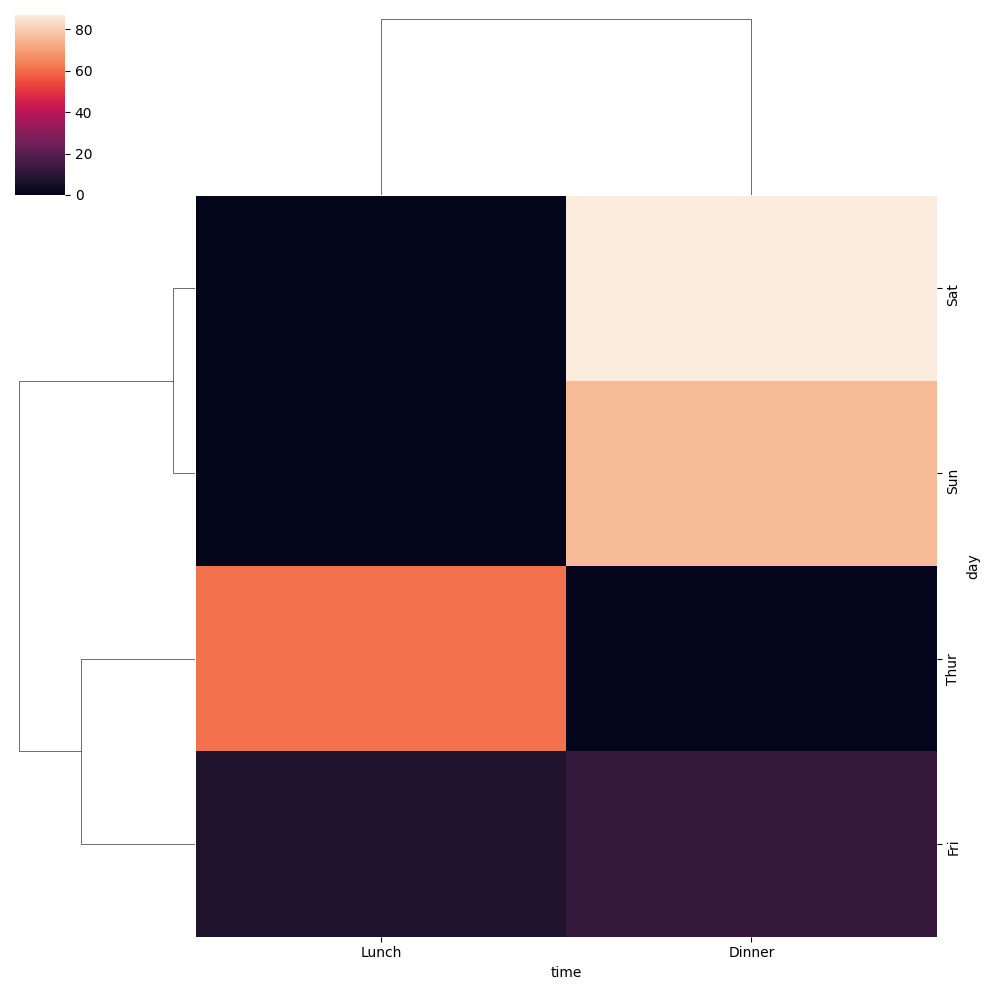

In [43]:
# 2) ClusterMap
# Purpose :- Visualize clusters in dataset (especially hierarchical clustering)
sns.clustermap(pd.crosstab(tips_data['day'],tips_data['time']))

### **4) Visualizing All the Numerical Columns**

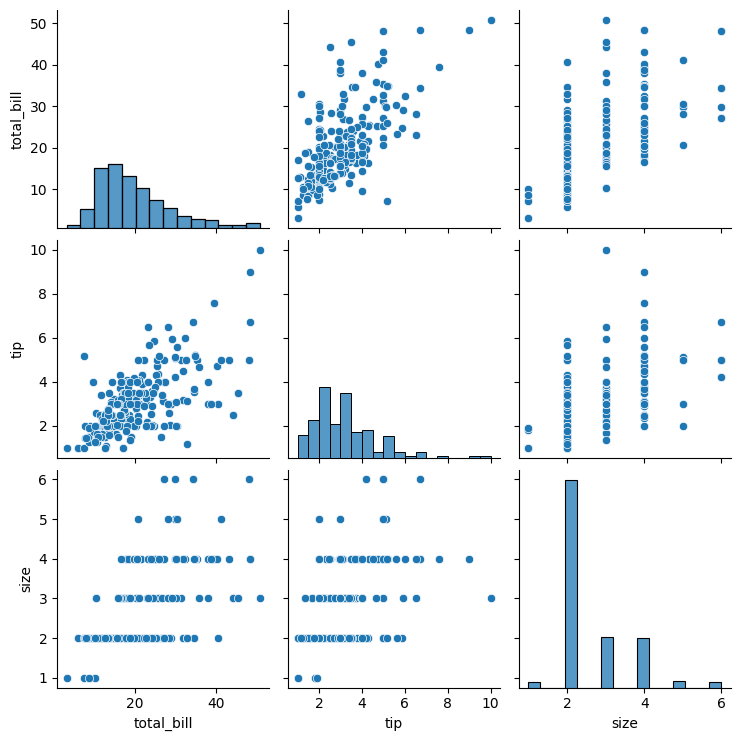

In [44]:
#1) Pairplot
# Purpose :- Visualize pairwise relationships between numerical variables.
sns.pairplot(tips_data)